In [91]:
#The sns.set_style sets the aesthetics of the plot 
#%config InlineBackend figure_format = ‘retina’  makes the plot higher resolution. 
#%matplotlib inline is a magic function that tells Matplotlib to generate our plots within the frontend 
import pandas as pan
import numpy as npy
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [92]:
#reading the file
ds = pan.read_csv("FIFA_Data.csv")
ds.head(10)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [93]:
# first step is to clean the data and remove unnecessary columns
del_col = ['Unnamed: 0','Flag','Club Logo','Photo','Special','Potential','Value','Preferred Foot','Weak Foot','Skill Moves','Work Rate','Body Type','Real Face','Position','Loaned From','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','Crossing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy','LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower','Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKDiving','GKHandling','GKKicking','GKPositioning','GKReflexes']


ds = ds.drop(del_col,axis = 1)
ds.head()

,ID,Name,Age,Nationality,Overall,Club,Wage,International Reputation,Jersey Number,Joined,Contract Valid Until,Height,Weight,Finishing,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€565K,5.0,10.0,"Jul 1, 2004",2021,5'7,159lbs,95.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K,5.0,7.0,"Jul 10, 2018",2022,6'2,183lbs,94.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K,5.0,10.0,"Aug 3, 2017",2022,5'9,150lbs,87.0,€228.1M
3,193080,De Gea,27,Spain,91,Manchester United,€260K,4.0,1.0,"Jul 1, 2011",2020,6'4,168lbs,13.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€355K,4.0,7.0,"Aug 30, 2015",2023,5'11,154lbs,82.0,€196.4M


In [94]:
#  dropping the duplicates from the dataset.
print(ds.shape)
ds = ds.drop_duplicates(keep='first')
print(ds.shape)

(18207, 15)
(18207, 15)


In [95]:
# Changing the joined column to DateTime column
ds.Joined = pan.to_datetime(ds['Joined'])
ds.head()

,ID,Name,Age,Nationality,Overall,Club,Wage,International Reputation,Jersey Number,Joined,Contract Valid Until,Height,Weight,Finishing,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€565K,5.0,10.0,2004-07-01,2021,5'7,159lbs,95.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K,5.0,7.0,2018-07-10,2022,6'2,183lbs,94.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K,5.0,10.0,2017-08-03,2022,5'9,150lbs,87.0,€228.1M
3,193080,De Gea,27,Spain,91,Manchester United,€260K,4.0,1.0,2011-07-01,2020,6'4,168lbs,13.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€355K,4.0,7.0,2015-08-30,2023,5'11,154lbs,82.0,€196.4M


In [96]:
ds.dtypes

ID                                   int64
Name                                object
Age                                  int64
Nationality                         object
Overall                              int64
Club                                object
Wage                                object
International Reputation           float64
Jersey Number                      float64
Joined                      datetime64[ns]
Contract Valid Until                object
Height                              object
Weight                              object
Finishing                          float64
Release Clause                      object
dtype: object

In [97]:
ds.describe()

,ID,Age,Overall,International Reputation,Jersey Number,Finishing
count,18207.000000,18207.000000,18207.000000,18159.000000,18147.000000,18159.000000
mean,214298.338606,25.122206,66.238699,1.113222,19.546096,45.550911
std,29965.244204,4.669943,6.908930,0.394031,15.947765,19.525820
min,16.000000,16.000000,46.000000,1.000000,1.000000,2.000000
25%,200315.500000,21.000000,62.000000,1.000000,8.000000,30.000000
50%,221759.000000,25.000000,66.000000,1.000000,17.000000,49.000000
75%,236529.500000,28.000000,71.000000,1.000000,26.000000,62.000000
max,246620.000000,45.000000,94.000000,5.000000,99.000000,95.000000


In [98]:
#1.selecting rows based on any multiple columns in the list
subset_value = ds[(ds['Overall'] > 90) & (ds['Overall'] < 94) ]
print(subset_value.head())

       ID          Name  Age Nationality  Overall                 Club   Wage  \
2  190871     Neymar Jr   26      Brazil       92  Paris Saint-Germain  €290K   
3  193080        De Gea   27       Spain       91    Manchester United  €260K   
4  192985  K. De Bruyne   27     Belgium       91      Manchester City  €355K   
5  183277     E. Hazard   27     Belgium       91              Chelsea  €340K   
6  177003     L. Modrić   32     Croatia       91          Real Madrid  €420K   

   International Reputation  Jersey Number     Joined Contract Valid Until  \
2                       5.0           10.0 2017-08-03                 2022   
3                       4.0            1.0 2011-07-01                 2020   
4                       4.0            7.0 2015-08-30                 2023   
5                       4.0           10.0 2012-07-01                 2020   
6                       4.0           10.0 2012-08-01                 2020   

  Height  Weight  Finishing Release Clause  

In [99]:
#2.Iterate over columns of a dataframe using dataframe.iteritems()
for (columns, columnData) in ds.iteritems():
   print('Colunm Name : ','\n', columns)
   print('Column Values : ','\n', columnData.values)

Colunm Name :  
 ID
Column Values :  
 [158023  20801 190871 ... 241638 246268 246269]
Colunm Name :  
 Name
Column Values :  
 ['L. Messi' 'Cristiano Ronaldo' 'Neymar Jr' ... 'B. Worman'
 'D. Walker-Rice' 'G. Nugent']
Colunm Name :  
 Age
Column Values :  
 [31 33 26 ... 16 17 16]
Colunm Name :  
 Nationality
Column Values :  
 ['Argentina' 'Portugal' 'Brazil' ... 'England' 'England' 'England']
Colunm Name :  
 Overall
Column Values :  
 [94 94 92 ... 47 47 46]
Colunm Name :  
 Club
Column Values :  
 ['FC Barcelona' 'Juventus' 'Paris Saint-Germain' ... 'Cambridge United'
 'Tranmere Rovers' 'Tranmere Rovers']
Colunm Name :  
 Wage
Column Values :  
 ['€565K' '€405K' '€290K' ... '€1K' '€1K' '€1K']
Colunm Name :  
 International Reputation
Column Values :  
 [5. 5. 5. ... 1. 1. 1.]
Colunm Name :  
 Jersey Number
Column Values :  
 [10.  7. 10. ... 33. 34. 33.]
Colunm Name :  
 Joined
Column Values :  
 ['2004-07-01T00:00:00.000000000' '2018-07-10T00:00:00.000000000'
 '2017-08-03T00:00:0

In [100]:
# 3.Iterate over two given columns only from the dataframe
for column in ds[['International Reputation', 'Jersey Number']]:

   column_sub = ds[column]
   print( column,'\n')
   print( column_sub.values)

International Reputation 

[5. 5. 5. ... 1. 1. 1.]
Jersey Number 

[10.  7. 10. ... 33. 34. 33.]


In [101]:
ds.head()

,ID,Name,Age,Nationality,Overall,Club,Wage,International Reputation,Jersey Number,Joined,Contract Valid Until,Height,Weight,Finishing,Release Clause
0,158023,L. Messi,31,Argentina,94,FC Barcelona,€565K,5.0,10.0,2004-07-01,2021,5'7,159lbs,95.0,€226.5M
1,20801,Cristiano Ronaldo,33,Portugal,94,Juventus,€405K,5.0,7.0,2018-07-10,2022,6'2,183lbs,94.0,€127.1M
2,190871,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€290K,5.0,10.0,2017-08-03,2022,5'9,150lbs,87.0,€228.1M
3,193080,De Gea,27,Spain,91,Manchester United,€260K,4.0,1.0,2011-07-01,2020,6'4,168lbs,13.0,€138.6M
4,192985,K. De Bruyne,27,Belgium,91,Manchester City,€355K,4.0,7.0,2015-08-30,2023,5'11,154lbs,82.0,€196.4M


In [102]:
#4. Iterate over the column names in reverse order

for column in reversed(ds.columns):

   column_rev = ds[column]
   print(column,'\n')
   print( column_rev.head())

Release Clause 

0    €226.5M
1    €127.1M
2    €228.1M
3    €138.6M
4    €196.4M
Name: Release Clause, dtype: object
Finishing 

0    95.0
1    94.0
2    87.0
3    13.0
4    82.0
Name: Finishing, dtype: float64
Weight 

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object
Height 

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object
Contract Valid Until 

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: object
Joined 

0   2004-07-01
1   2018-07-10
2   2017-08-03
3   2011-07-01
4   2015-08-30
Name: Joined, dtype: datetime64[ns]
Jersey Number 

0    10.0
1     7.0
2    10.0
3     1.0
4     7.0
Name: Jersey Number, dtype: float64
International Reputation 

0    5.0
1    5.0
2    5.0
3    4.0
4    4.0
Name: International Reputation, dtype: float64
Wage 

0    €565K
1    €405K
2    €290K
3    €260K
4    €355K
Name: Wage, dtype: object
Club 

0           FC Barcelona
1               Juventus
2  

In [103]:
# 5.sort the rows of dataframe based on row index label names
ds = ds.sort_index()
print(ds.head())

       ID               Name  Age Nationality  Overall                 Club  \
0  158023           L. Messi   31   Argentina       94         FC Barcelona   
1   20801  Cristiano Ronaldo   33    Portugal       94             Juventus   
2  190871          Neymar Jr   26      Brazil       92  Paris Saint-Germain   
3  193080             De Gea   27       Spain       91    Manchester United   
4  192985       K. De Bruyne   27     Belgium       91      Manchester City   

    Wage  International Reputation  Jersey Number     Joined  \
0  €565K                       5.0           10.0 2004-07-01   
1  €405K                       5.0            7.0 2018-07-10   
2  €290K                       5.0           10.0 2017-08-03   
3  €260K                       4.0            1.0 2011-07-01   
4  €355K                       4.0            7.0 2015-08-30   

  Contract Valid Until Height  Weight  Finishing Release Clause  
0                 2021    5'7  159lbs       95.0        €226.5M  
1       

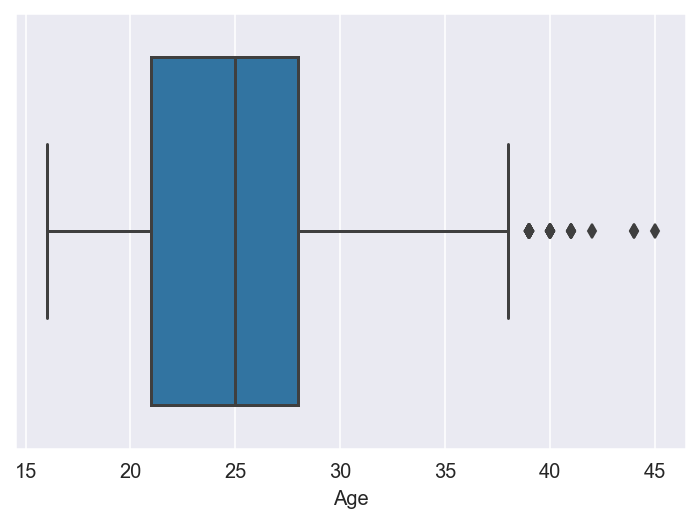

In [104]:
#data visualization
sns.boxplot(ds['Age'])

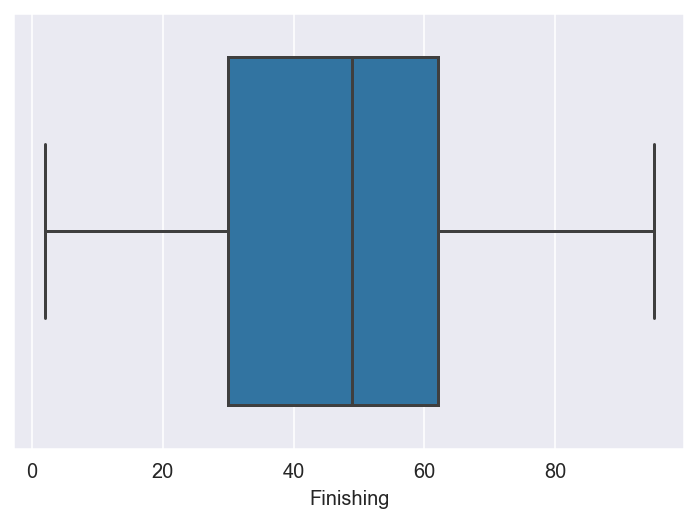

In [109]:
sns.boxplot(ds['Finishing'])

In [106]:
ds.corr()

,ID,Age,Overall,International Reputation,Jersey Number,Finishing
ID,1.000000,-0.739208,-0.417025,-0.356191,0.182074,-0.082323
Age,-0.739208,1.000000,0.452350,0.253765,-0.241156,0.068660
Overall,-0.417025,0.452350,1.000000,0.499491,-0.218931,0.332515
International Reputation,-0.356191,0.253765,0.499491,1.000000,-0.077298,0.178373
Jersey Number,0.182074,-0.241156,-0.218931,-0.077298,1.000000,-0.006639
Finishing,-0.082323,0.068660,0.332515,0.178373,-0.006639,1.000000


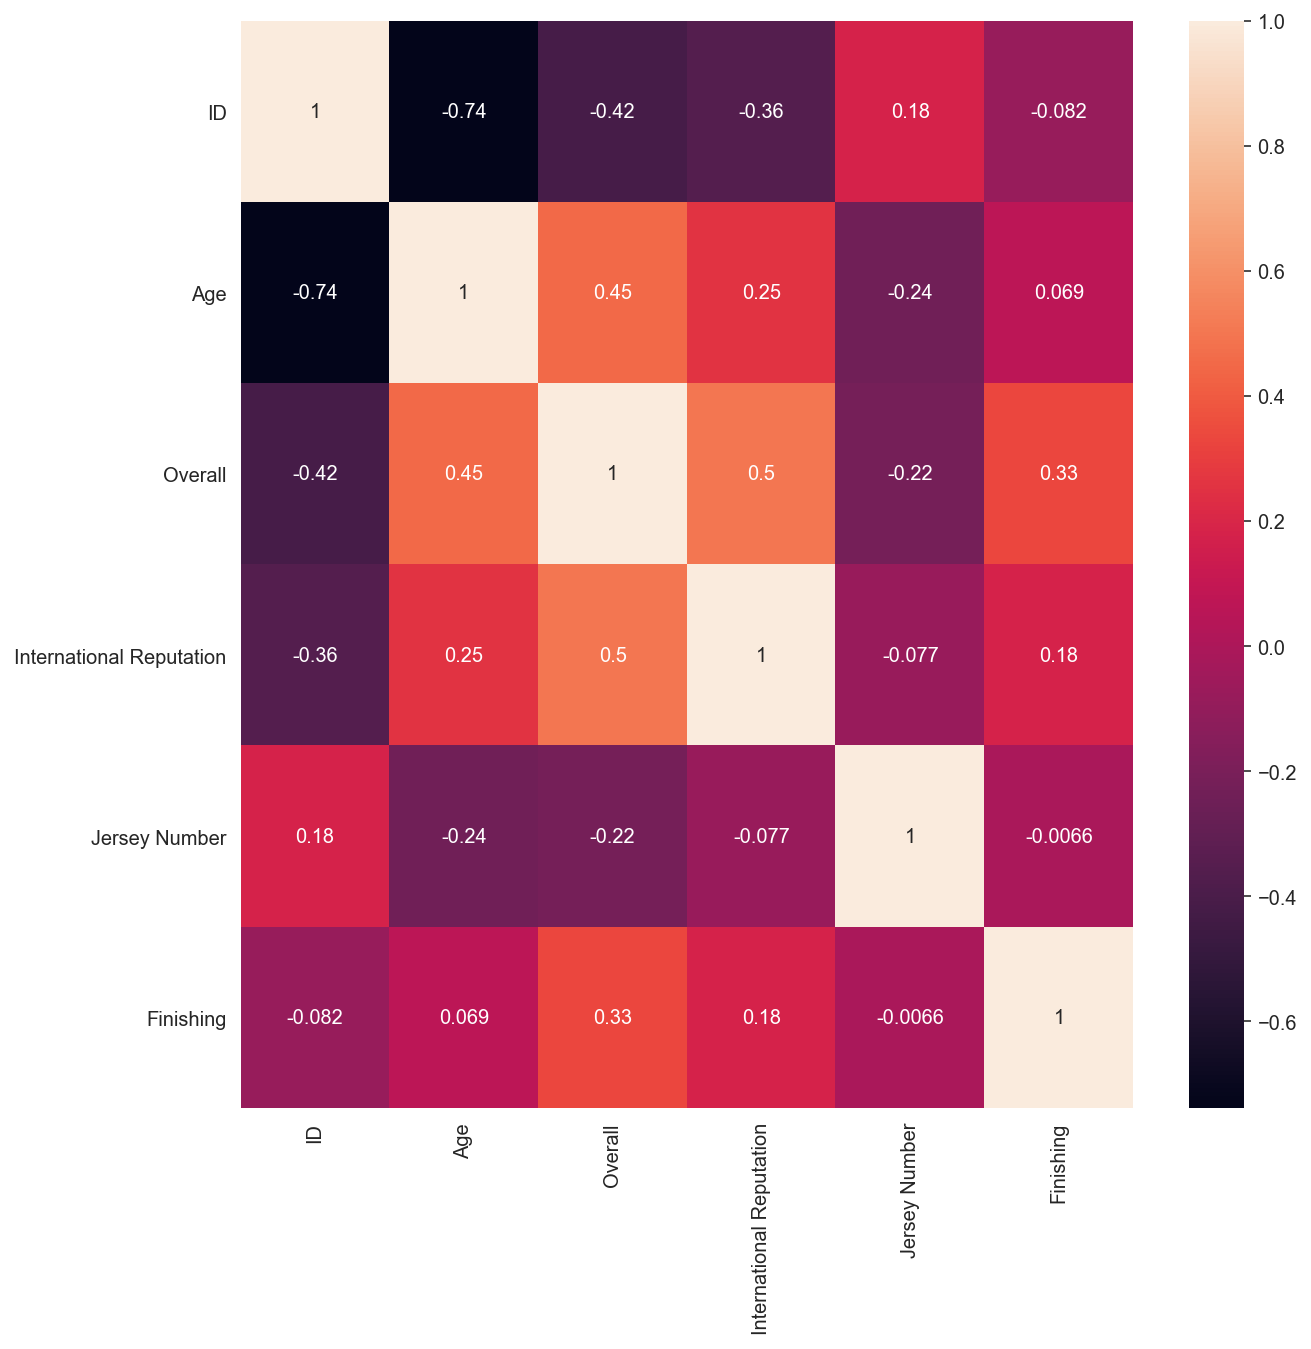

In [107]:
#correlation matrices using heatmap
plt.subplots(figsize = (10,10))
sns.heatmap(ds.corr(),annot = True)

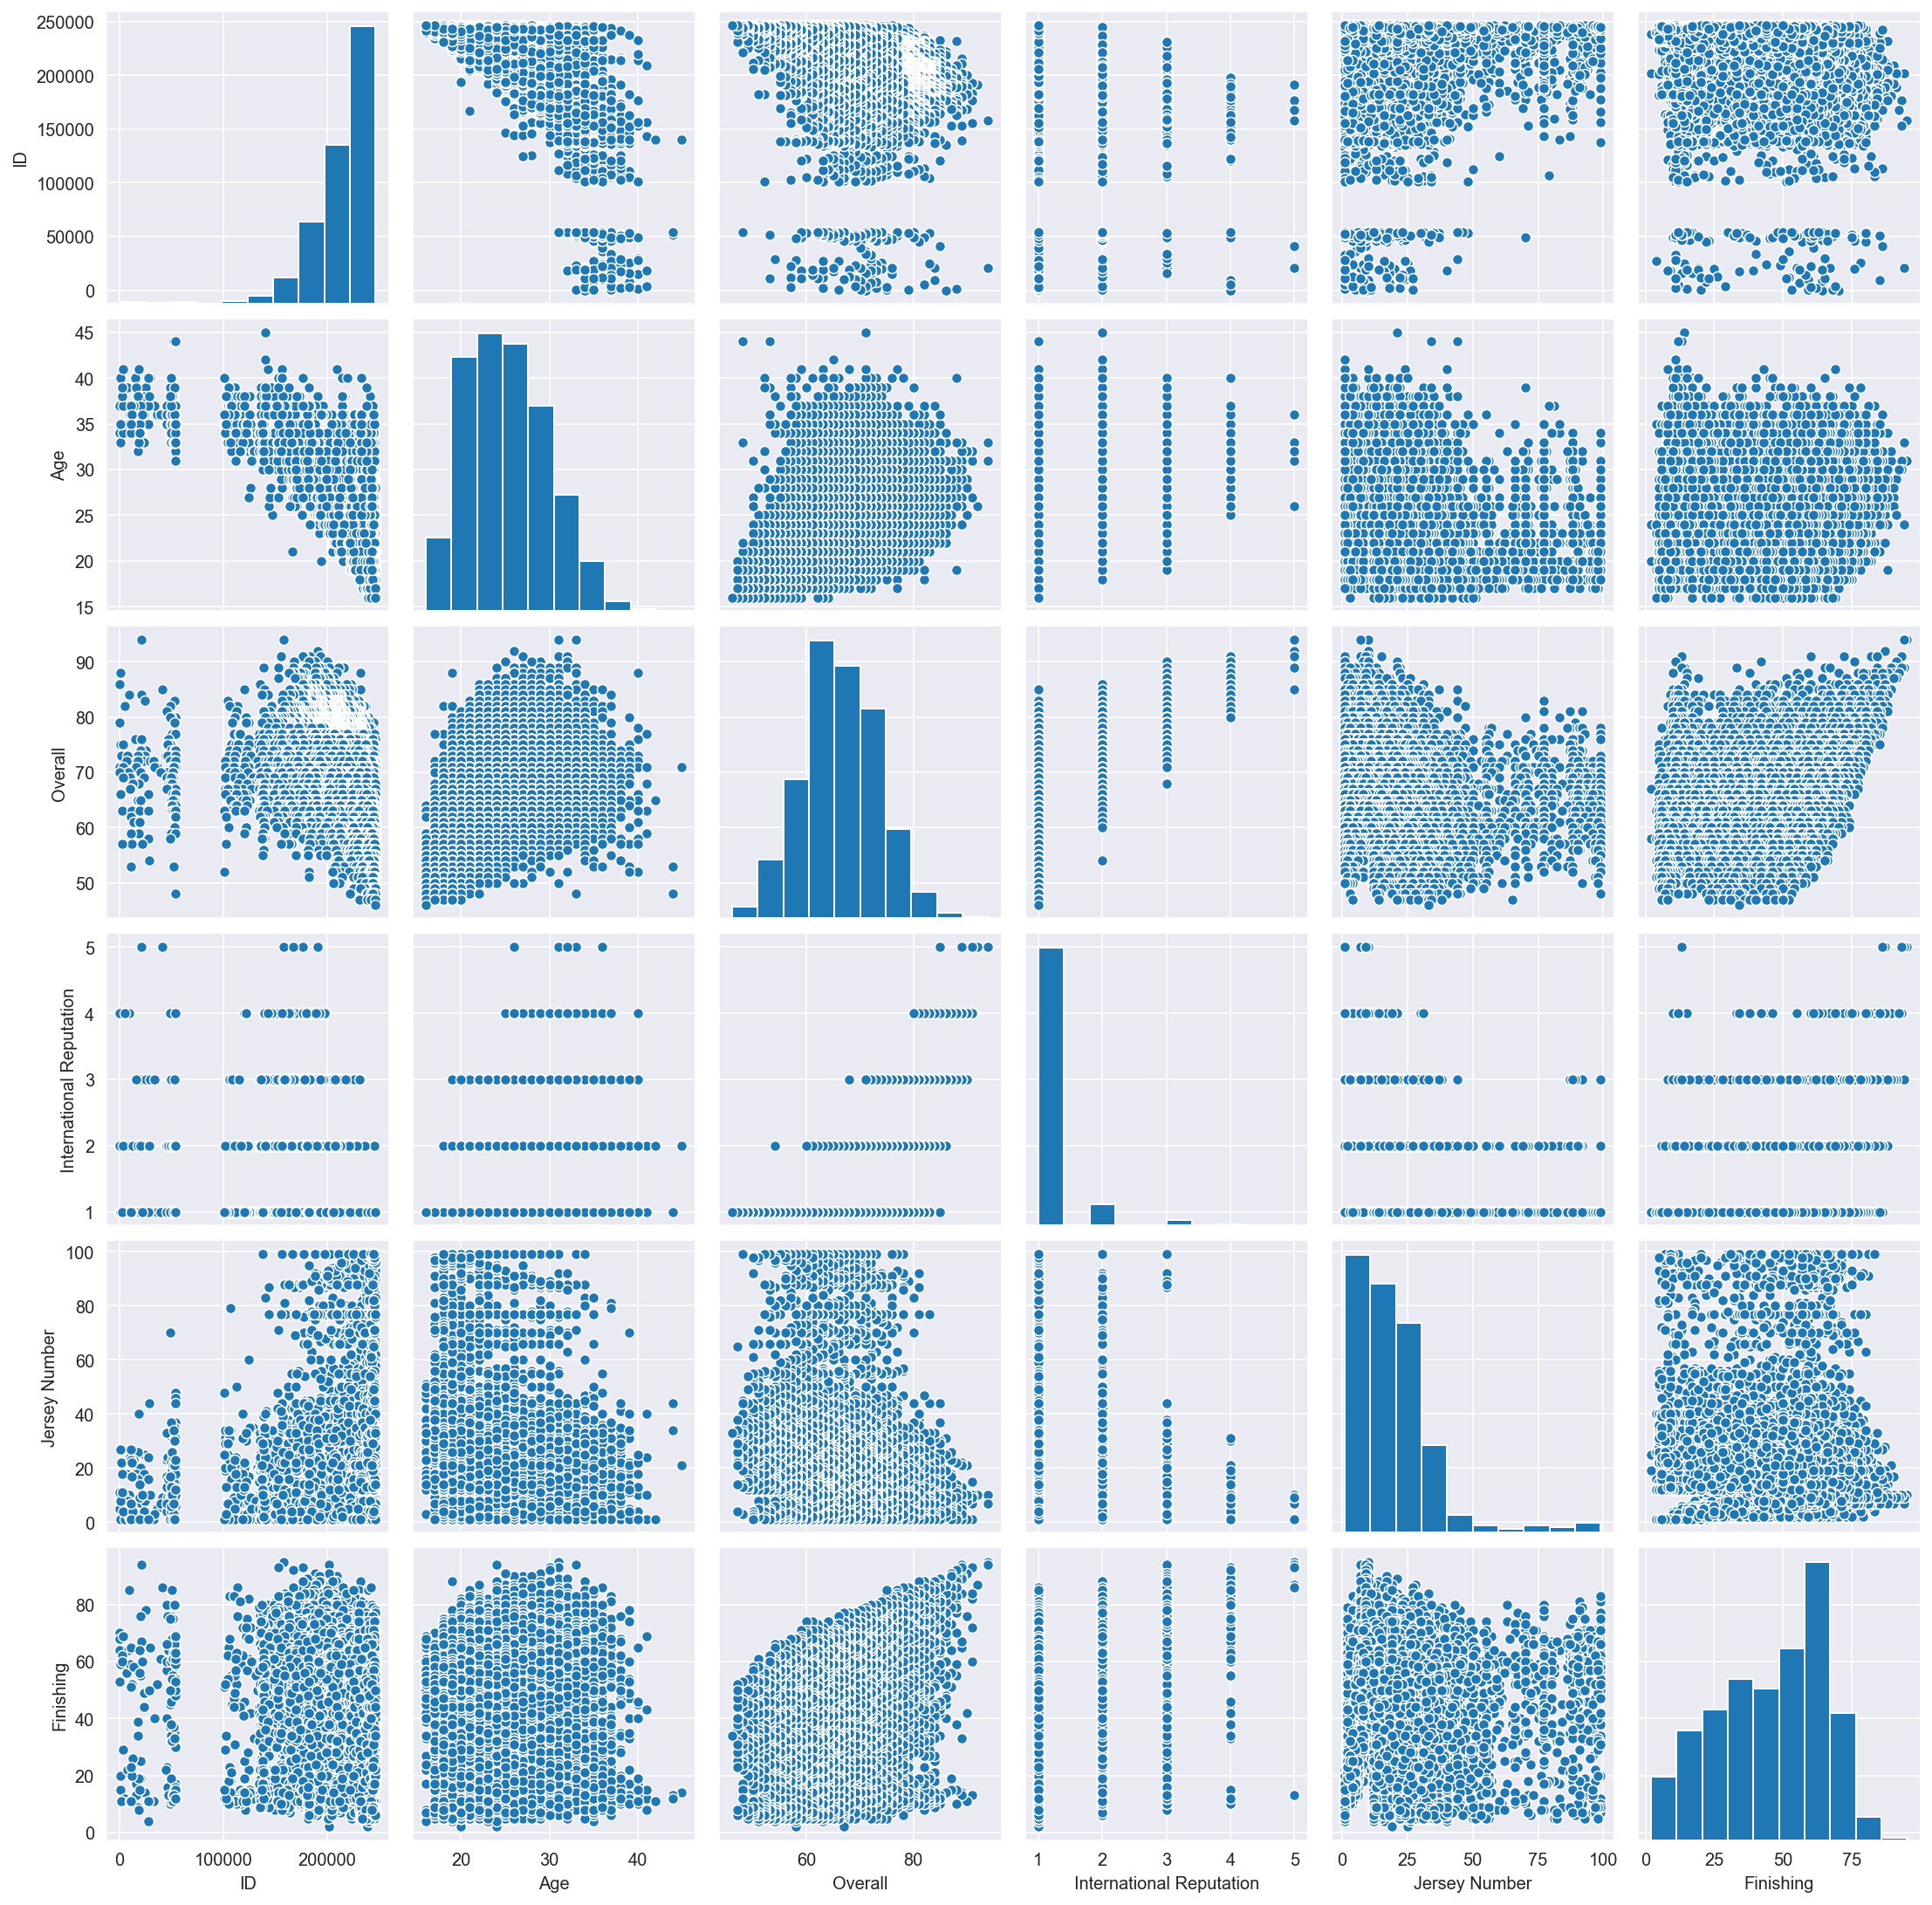

In [108]:
# to check the linear relationship between variables using pairplot function
sns.pairplot(ds)